In [3]:
import allel
import seaborn as sns
import zarr
import xarray as xr
import plotly.express as px
import dask.array as da
import numpy as np
import json
import hashlib
import pandas as pd
import bokeh.plotting as bkplt
import bokeh.io as bkio
import bokeh.palettes as bokpalet
import bokeh.models as bkmod
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from Bio import SeqIO
from pathlib import Path
import sys

In [6]:
# Let's plot some data on the map
df_samples = pd.read_table('/scratch/user/uqtdenni/far_hin_1.x/work/metadata_development_20250702/sample_metadata_pass_qc_fix.txt', index_col = 'derived_sample_id')
#df_si = df_samples.query('species == "hinesorum" & country_iso == "SB"')
proposed_sites = pd.read_table('/home/uqtdenni/far_hin_1.x/tracking/uq-beebe-001/pop-gen-2025/fieldwork_sites.txt')

In [7]:
lalo_pre = df_samples.query('country_iso == "SB"')[['latitude','longitude']].reset_index(drop=True).drop_duplicates()
lalo_pre['type'] = 'Previous Collection'
lalo_pre['name'] = 'Previous Collection'


allcollections = pd.concat([lalo_pre, proposed_sites[['type','name','latitude','longitude']]])
allcollections

,latitude,longitude,type,name
0,-9.420000,160.133000,Previous Collection,Previous Collection
5,-9.428000,160.130000,Previous Collection,Previous Collection
6,-9.431000,160.091000,Previous Collection,Previous Collection
10,-9.353000,159.594000,Previous Collection,Previous Collection
12,-9.302000,159.607000,Previous Collection,Previous Collection
13,-9.289000,159.622000,Previous Collection,Previous Collection
14,-9.419000,160.062000,Previous Collection,Previous Collection
19,-9.791000,161.970000,Previous Collection,Previous Collection
20,-9.792000,161.970000,Previous Collection,Previous Collection
21,-9.793000,161.970000,Previous Collection,Previous Collection


In [8]:
types = allcollections['type'].unique()
colours = ["#e6e6e6", " #000000", "#800000", "#4d79ff", "#339933"]
colour_map = {type_val: colours[i % len(colours)] for i, type_val in enumerate(types)}
colour_map.get('Larval Site')



colours = ["#808080", "#000000", "#800000", "#4d79ff", "#339933"]
unique_types = allcollections['type'].unique()
colour_map = dict(zip(unique_types, colours[:len(unique_types)]))
colour_map

{'Previous Collection': '#808080',
 'Capital': '#000000',
 'HLC Site': '#800000',
 'Field Insectary Site': '#4d79ff',
 'Larval Site': '#339933'}

/home/uqtdenni/.conda/envs/far_hin_1.x/lib/python3.13/site-packages/pyproj/transformer.py:817: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/uqtdenni/.conda/envs/far_hin_1.x/lib/python3.13/site-packages/pyproj/transformer.py:817: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/uqtdenni/.conda/envs/far_hin_1.x/lib/python3.13/site-packages/pyproj/transformer.py:817: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/uqtdenni/.conda/envs/far_hin_1.x/lib/python3.13/site-packages/pyproj/transformer.py:817: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/uqtdenni/.conda/envs/far_hin_1.x/lib/python3.13/site-packages/pyproj/transformer.py:817: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/uqtd

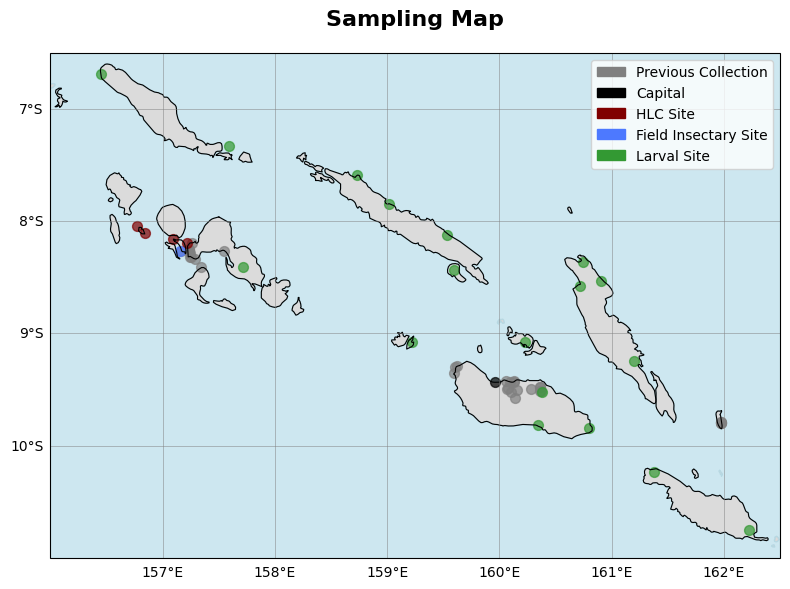

In [9]:

# Create figure and axis with appropriate projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent for Solomon Islands
# Longitude: approximately 155°E to 170°E
# Latitude: approximately 12°S to 5°S
solomon_extent = [156, 162.5, -11, -6.5]
ax.set_extent(solomon_extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.8)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.7)

# Add gridlines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                  linewidth=0.5, color='gray', alpha=0.7)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Add title
plt.title('Sampling Map', fontsize=16, fontweight='bold', pad=20)

# Add some major island labels (approximate positions)
# These are rough positions for the main island groups
island_labels = [
    ('Choiseul', 157.0, -7.0),
    ('Santa Isabel', 159.0, -8.0),
    ('Guadalcanal', 160.0, -9.5),
    ('Malaita', 161.0, -9.0),
    ('San Cristobal', 162.0, -10.5),
    ('Bougainville', 155.5, -6.5),
    ('New Georgia', 157.5, -8.5)
]

for idx, row in allcollections.iterrows():
    color = colour_map.get(row['type'])  # Default to black if not found
    ax.scatter(row['longitude'], row['latitude'], 
               transform=ccrs.PlateCarree(), 
               s=50, alpha=0.7, c=color)

#for name, lon, lat in island_labels:
#    ax.text(lon, lat, name, transform=ccrs.PlateCarree(), 
#            fontsize=9, ha='center', va='center',
#            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Add capital city
#ax.plot(159.95, -9.43, 'ro', markersize=8, transform=ccrs.PlateCarree())
#ax.text(159.95, -9.1, 'Honiara', transform=ccrs.PlateCarree(),
#        fontsize=10, ha='center', va='bottom', fontweight='bold',
#        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

# Add a scale reference
#ax.text(0.02, 0.02, 'Projection: PlateCarree\nData: Natural Earth', 
#        transform=ax.transAxes, fontsize=8, va='bottom',
#        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

import matplotlib.patches as mpatches
legend_elements = []
for type_name, color in colour_map.items():
    legend_elements.append(mpatches.Patch(color=color, label=type_name))

ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
plt.savefig('solomon_islands_outline.svg', dpi=750, bbox_inches='tight')
plt.tight_layout()
#plt.show()

# Optional: Save the plot


In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

def plot_wpa_map(df, title, extent=[125, 171, -25, 0]):
    # Create map with cartopy
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.add_feature(cfeature.LAND, color='lightgray')
    
    # Set extent [west, east, south, north]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    # Color mapping dictionary for standardization across plots
    iso_colors = {
        'PG-GPK': '#1f77b4', 'PG-NSB': '#ff7f0e', 'SB-GU': '#2ca02c',
        'PG-MRL': '#d62728', 'AU-NT': '#9467bd', 'AU-QLD': '#8c564b',
        'SB-MK': '#e377c2', 'VU-SEE': '#7f7f7f', 'SB-WE': '#bcbd22',
        'PG-NPP': '#17becf', 'PG-MPL': '#aec7e8', 'PG-MPM': '#ffbb78',
        'PG-ESW': '#98df8a', 'PG-WPD': '#ff9896', 'PG-MBA': '#c5b0d5',
        'PG-CPM': '#c49c94', 'PG-HLA': '#f7b6d3', 'PG-SHM': '#c7c7c7',
        'PG-UNK': '#dbdb8d'
    }
    
    
    # Plot points colored by admin1_iso
    for iso in df['admin1_iso'].unique():
        data = df[df['admin1_iso'] == iso]
        color = iso_colors.get(iso, '#000000')  # Default to black if not found
        ax.scatter(data['longitude'], data['latitude'], 
                   transform=ccrs.PlateCarree(), 
                   label=iso, s=70, alpha=0.9, c=color)
    
    #ax.legend()
    plt.title(f'Species: {title}')
    plt.show()

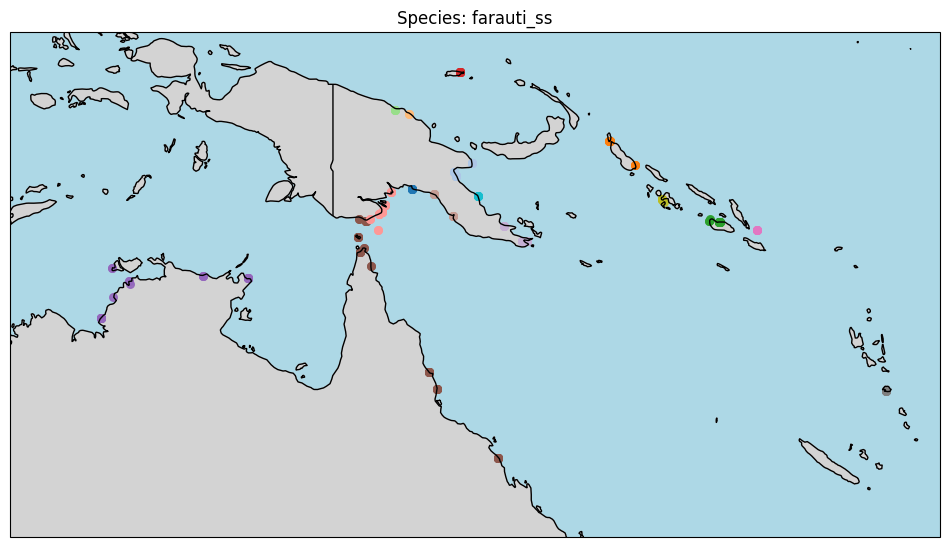

In [24]:
far_df = df_samples.query('species_pca == "farauti_ss"')
plot_wpa_map(far_df, 'farauti_ss')

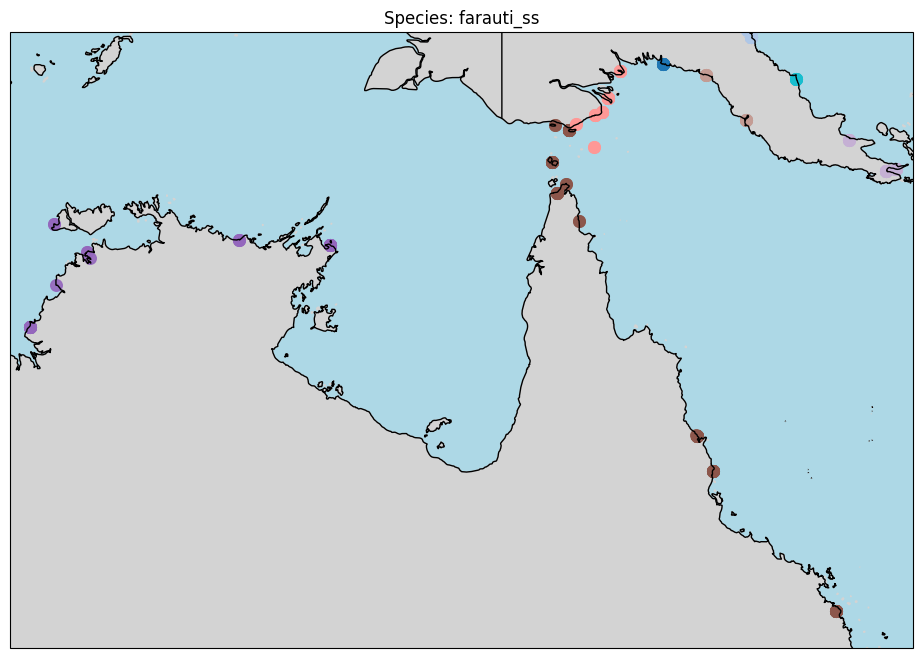

In [34]:
far_df = df_samples.query('species_pca == "farauti_ss"')
plot_wpa_map(far_df, 'farauti_ss', extent = [129, 151, -7, -22])

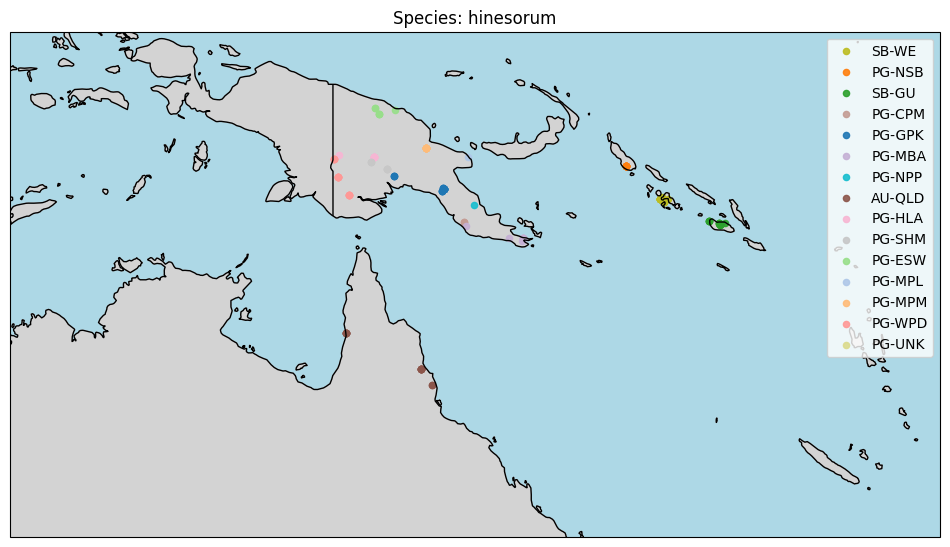

In [12]:
far_df = df_samples.query('species_pca == "hinesorum"')
plot_wpa_map(far_df, 'hinesorum')